In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
import statistics
%matplotlib inline

In [2]:
df = pd.read_csv('dataset-SA.csv', low_memory=False)

In [3]:
df.head()

city_name            countyname  statefp statecode  bldg_count  \
0  Washington  District of Columbia       11        DC           1   
1  Washington  District of Columbia       11        DC           1   
2  Washington  District of Columbia       11        DC           1   
3  Washington  District of Columbia       11        DC           1   
4  Washington  District of Columbia       11        DC           1   

  reported_propertytype reported_propertysubtype  rentablebuildingarea_mean  \
0                Office                      NaN                      28000   
1             Specialty                   Marina                      15300   
2             Specialty                   Marina                      13900   
3                  Flex       Light Distribution                      29000   
4                  Flex       Light Distribution                       8100   

   yearbuilt_mean  stories  index doe_prototype  \
0          2017.0      3.0     37        office   
1          1980.0      1.0     83      no_match   
2          1980.0      2.0     83      no_match   
3          1925.0      2.0      2     warehouse   
4          1925.0      2.0      2     warehouse   

                                cbecs  area_sum    placeid  countyid  \
0  Administrative/professional office     28000        NaN     11001   
1                               Other     15300        NaN     11001   
2                               Other     13900        NaN     11001   
3        Distribution/shipping center     29000  1150000.0     11001   
4        Distribution/shipping center      8100  1150000.0     11001   

   Unnamed: 16  Unnamed: 17  Unnamed: 18 Unnamed: 19  
0          NaN          NaN          NaN         NaN  
1          NaN          NaN          NaN         NaN  
2          NaN          NaN          NaN         NaN  
3          NaN          NaN          NaN         NaN  
4          NaN          NaN          NaN         NaN

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448027 entries, 0 to 448026
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   city_name                  448027 non-null  object 
 1   countyname                 448027 non-null  object 
 2   statefp                    448027 non-null  int64  
 3   statecode                  448027 non-null  object 
 4   bldg_count                 448027 non-null  int64  
 5   reported_propertytype      448027 non-null  object 
 6   reported_propertysubtype   337617 non-null  object 
 7   rentablebuildingarea_mean  448027 non-null  int64  
 8   yearbuilt_mean             392616 non-null  float64
 9   stories                    415260 non-null  float64
 10  index                      448027 non-null  int64  
 11  doe_prototype              448027 non-null  object 
 12  cbecs                      448022 non-null  object 
 13  area_sum                   44

In [5]:
df.columns[df.isnull().any()]

Index(['reported_propertysubtype', 'yearbuilt_mean', 'stories', 'cbecs',
       'placeid', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19'],
      dtype='object')

In [6]:
df = df[df.columns[:-1]]
df = df[df.columns[:-1]]
df = df[df.columns[:-1]]
df = df[df.columns[:-1]]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448027 entries, 0 to 448026
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   city_name                  448027 non-null  object 
 1   countyname                 448027 non-null  object 
 2   statefp                    448027 non-null  int64  
 3   statecode                  448027 non-null  object 
 4   bldg_count                 448027 non-null  int64  
 5   reported_propertytype      448027 non-null  object 
 6   reported_propertysubtype   337617 non-null  object 
 7   rentablebuildingarea_mean  448027 non-null  int64  
 8   yearbuilt_mean             392616 non-null  float64
 9   stories                    415260 non-null  float64
 10  index                      448027 non-null  int64  
 11  doe_prototype              448027 non-null  object 
 12  cbecs                      448022 non-null  object 
 13  area_sum                   44

In [8]:
df.isna().sum()

city_name                         0
countyname                        0
statefp                           0
statecode                         0
bldg_count                        0
reported_propertytype             0
reported_propertysubtype     110410
rentablebuildingarea_mean         0
yearbuilt_mean                55411
stories                       32767
index                             0
doe_prototype                     0
cbecs                             5
area_sum                          0
placeid                      151960
countyid                          0
dtype: int64

In [9]:
df = df[df['yearbuilt_mean'].notna()]

In [10]:
df.isna().sum()

city_name                         0
countyname                        0
statefp                           0
statecode                         0
bldg_count                        0
reported_propertytype             0
reported_propertysubtype      97092
rentablebuildingarea_mean         0
yearbuilt_mean                    0
stories                       22516
index                             0
doe_prototype                     0
cbecs                             0
area_sum                          0
placeid                      129984
countyid                          0
dtype: int64

In [11]:
df

city_name            countyname  statefp statecode  bldg_count  \
0       Washington  District of Columbia       11        DC           1   
1       Washington  District of Columbia       11        DC           1   
2       Washington  District of Columbia       11        DC           1   
3       Washington  District of Columbia       11        DC           1   
4       Washington  District of Columbia       11        DC           1   
...            ...                   ...      ...       ...         ...   
448012    Winfield         Putnam County       54        WV           1   
448013    Winfield         Putnam County       54        WV           1   
448014    Winfield         Putnam County       54        WV           1   
448018    Winfield         Putnam County       54        WV           1   
448025    Winfield         Putnam County       54        WV           1   

       reported_propertytype  reported_propertysubtype  \
0                     Office                       NaN   
1                  Specialty                    Marina   
2                  Specialty                    Marina   
3                       Flex        Light Distribution   
4                       Flex        Light Distribution   
...                      ...                       ...   
448012                Retail              Freestanding   
448013                Retail              Freestanding   
448014                Retail              Freestanding   
448018                Retail  Storefront Retail/Office   
448025             Specialty        Religious Facility   

        rentablebuildingarea_mean  yearbuilt_mean  stories  index  \
0                           28000          2017.0      3.0     37   
1                           15300          1980.0      1.0     83   
2                           13900          1980.0      2.0     83   
3                           29000          1925.0      2.0      2   
4                            8100          1925.0      2.0      2   
...                           ...             ...      ...    ...   
448012                      12100          2011.0      1.0      9   
448013                      24400          2011.0      1.0      9   
448014                       6900          2014.0      1.0      9   
448018                      12000          2007.0      1.0     64   
448025                       2200          1995.0      1.0     93   

       doe_prototype                               cbecs  area_sum    placeid  \
0             office  Administrative/professional office     28000        NaN   
1           no_match                               Other     15300        NaN   
2           no_match                               Other     13900        NaN   
3          warehouse        Distribution/shipping center     29000  1150000.0   
4          warehouse        Distribution/shipping center      8100  1150000.0   
...              ...                                 ...       ...        ...   
448012        retail                        Retail store     12100  5487988.0   
448013        retail                        Retail store     24400  5487988.0   
448014        retail                        Retail store      6900  5487988.0   
448018        office                    Mixed-use office     12000  5487988.0   
448025      no_match                   Religious worship      2200  5487988.0   

        countyid  
0          11001  
1          11001  
2          11001  
3          11001  
4          11001  
...          ...  
448012     54079  
448013     54079  
448014     54079  
448018     54079  
448025     54079  

[392616 rows x 16 columns]

In [12]:
df = df[df['reported_propertysubtype'].notna()]

In [13]:
df.head()

city_name            countyname  statefp statecode  bldg_count  \
1  Washington  District of Columbia       11        DC           1   
2  Washington  District of Columbia       11        DC           1   
3  Washington  District of Columbia       11        DC           1   
4  Washington  District of Columbia       11        DC           1   
5  Washington  District of Columbia       11        DC           1   

  reported_propertytype reported_propertysubtype  rentablebuildingarea_mean  \
1             Specialty                   Marina                      15300   
2             Specialty                   Marina                      13900   
3                  Flex       Light Distribution                      29000   
4                  Flex       Light Distribution                       8100   
5                  Flex       Light Distribution                       2700   

   yearbuilt_mean  stories  index doe_prototype                         cbecs  \
1          1980.0      1.0     83      no_match                         Other   
2          1980.0      2.0     83      no_match                         Other   
3          1925.0      2.0      2     warehouse  Distribution/shipping center   
4          1925.0      2.0      2     warehouse  Distribution/shipping center   
5          1930.0      2.0      2     warehouse  Distribution/shipping center   

   area_sum    placeid  countyid  
1     15300        NaN     11001  
2     13900        NaN     11001  
3     29000  1150000.0     11001  
4      8100  1150000.0     11001  
5      2700  1150000.0     11001

In [14]:
df.isna().sum()

city_name                        0
countyname                       0
statefp                          0
statecode                        0
bldg_count                       0
reported_propertytype            0
reported_propertysubtype         0
rentablebuildingarea_mean        0
yearbuilt_mean                   0
stories                      14244
index                            0
doe_prototype                    0
cbecs                            0
area_sum                         0
placeid                      98457
countyid                         0
dtype: int64

In [15]:
mean_value = df['placeid'].mean() 

df['placeid'].fillna(value=mean_value) 

1         2.522154e+06
2         2.522154e+06
3         1.150000e+06
4         1.150000e+06
5         1.150000e+06
              ...     
448012    5.487988e+06
448013    5.487988e+06
448014    5.487988e+06
448018    5.487988e+06
448025    5.487988e+06
Name: placeid, Length: 295524, dtype: float64

In [16]:
df.isna().sum()

city_name                        0
countyname                       0
statefp                          0
statecode                        0
bldg_count                       0
reported_propertytype            0
reported_propertysubtype         0
rentablebuildingarea_mean        0
yearbuilt_mean                   0
stories                      14244
index                            0
doe_prototype                    0
cbecs                            0
area_sum                         0
placeid                      98457
countyid                         0
dtype: int64

In [17]:
mean_value = df['stories'].mean() 

df['stories'].fillna(value=mean_value) 

1         1.0
2         2.0
3         2.0
4         2.0
5         2.0
         ... 
448012    1.0
448013    1.0
448014    1.0
448018    1.0
448025    1.0
Name: stories, Length: 295524, dtype: float64

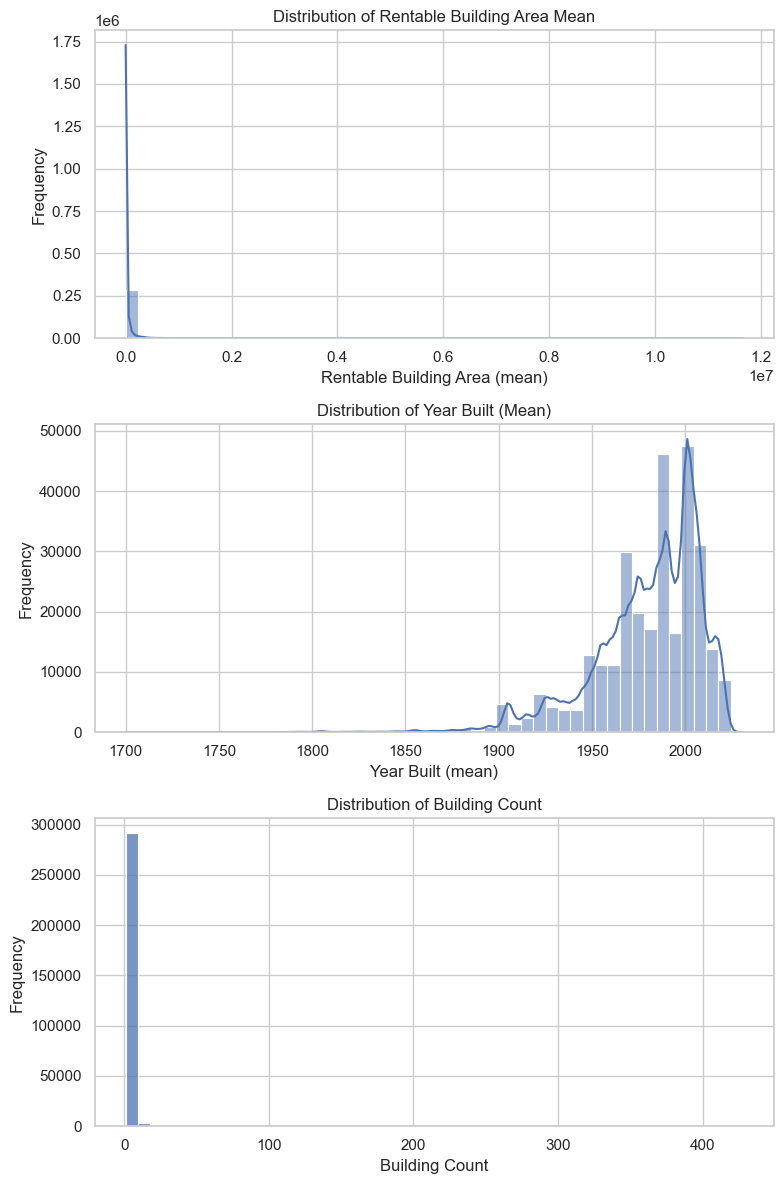

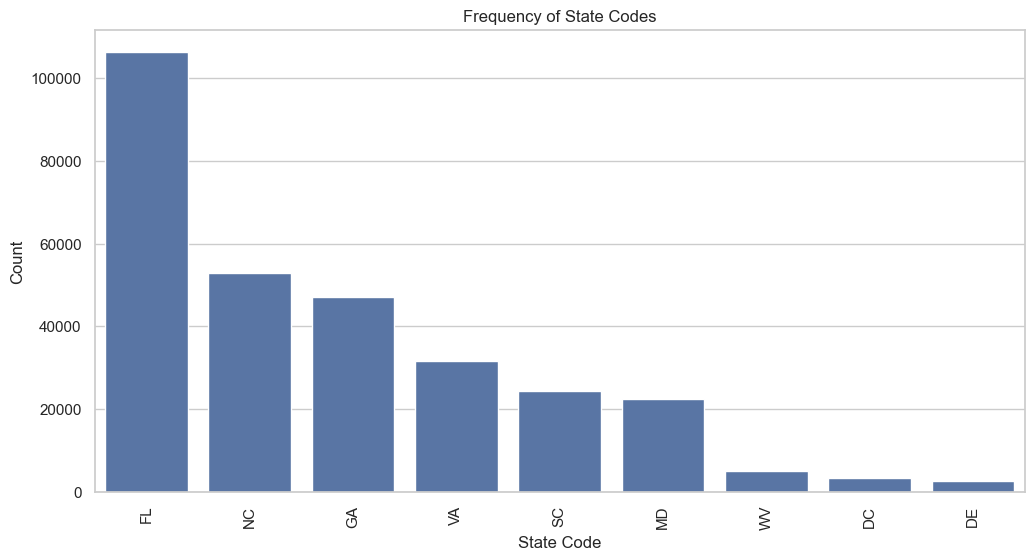

In [18]:
sns.set(style="whitegrid")

# Univariate Analysis: Numerical Data
fig, ax = plt.subplots(3, 1, figsize=(8, 12))

# Distribution of rentablebuildingarea_mean
sns.histplot(df['rentablebuildingarea_mean'].dropna(), bins=50, kde=True, ax=ax[0])
ax[0].set_title('Distribution of Rentable Building Area Mean')
ax[0].set_xlabel('Rentable Building Area (mean)')
ax[0].set_ylabel('Frequency')

# Distribution of yearbuilt_mean
sns.histplot(df['yearbuilt_mean'], bins=50, kde=True, ax=ax[1])
ax[1].set_title('Distribution of Year Built (Mean)')
ax[1].set_xlabel('Year Built (mean)')
ax[1].set_ylabel('Frequency')

# Distribution of bldg_count
sns.histplot(df['bldg_count'].dropna(), bins=50, kde=False, ax=ax[2])
ax[2].set_title('Distribution of Building Count')
ax[2].set_xlabel('Building Count')
ax[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Univariate Analysis: Categorical Data - Statecode
plt.figure(figsize=(12, 6))
state_code_counts = df['statecode'].value_counts()
sns.barplot(x=state_code_counts.index, y=state_code_counts.values)
plt.title('Frequency of State Codes')
plt.xlabel('State Code')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

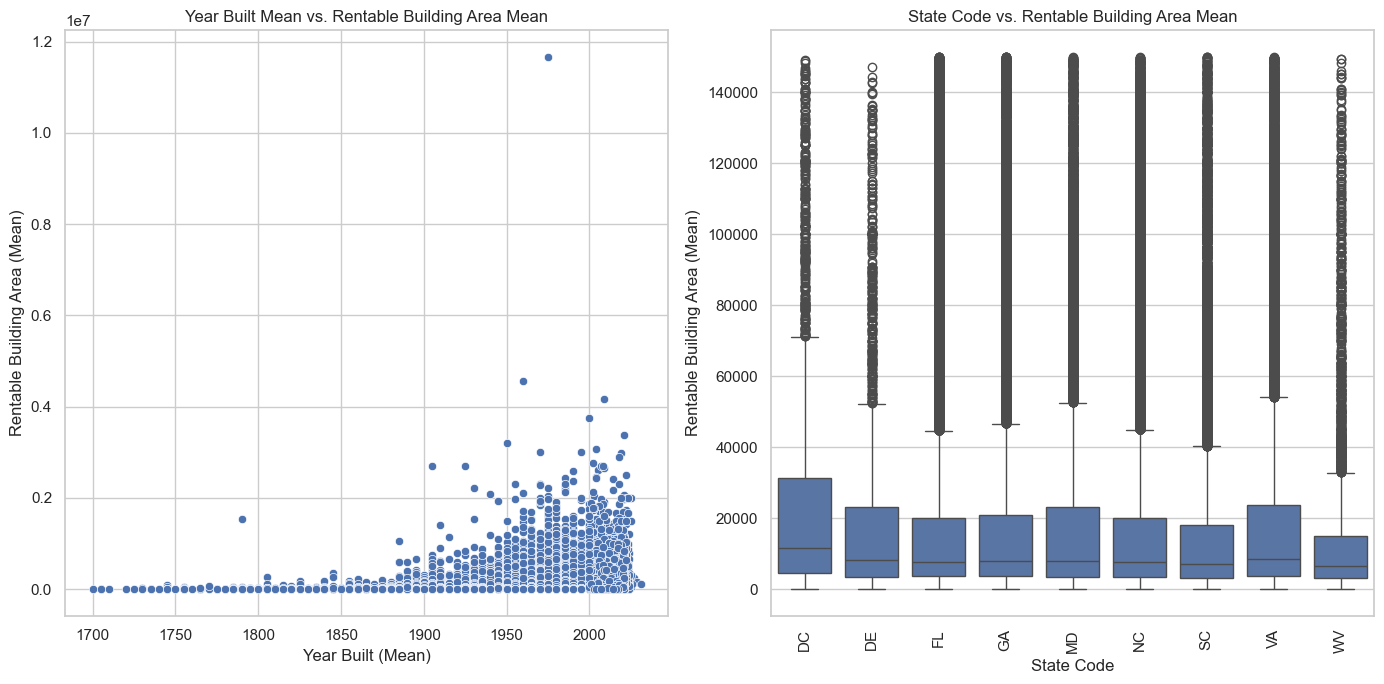

In [19]:
# Bivariate Analysis

# Set up the figure size for plots
plt.figure(figsize=(14, 7))

# Scatter plot between 'rentablebuildingarea_mean' and 'yearbuilt_mean'
plt.subplot(1, 2, 1)
sns.scatterplot(x='yearbuilt_mean', y='rentablebuildingarea_mean', data=df)
plt.title('Year Built Mean vs. Rentable Building Area Mean')
plt.xlabel('Year Built (Mean)')
plt.ylabel('Rentable Building Area (Mean)')

# Boxplot for 'statecode' vs 'rentablebuildingarea_mean' to see distribution across states
plt.subplot(1, 2, 2)
state_code_sample = df[df['rentablebuildingarea_mean'] < df['rentablebuildingarea_mean'].quantile(0.95)]  # Limiting to 95th percentile for clearer visualization
sns.boxplot(x='statecode', y='rentablebuildingarea_mean', data=state_code_sample)
plt.title('State Code vs. Rentable Building Area Mean')
plt.xlabel('State Code')
plt.ylabel('Rentable Building Area (Mean)')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


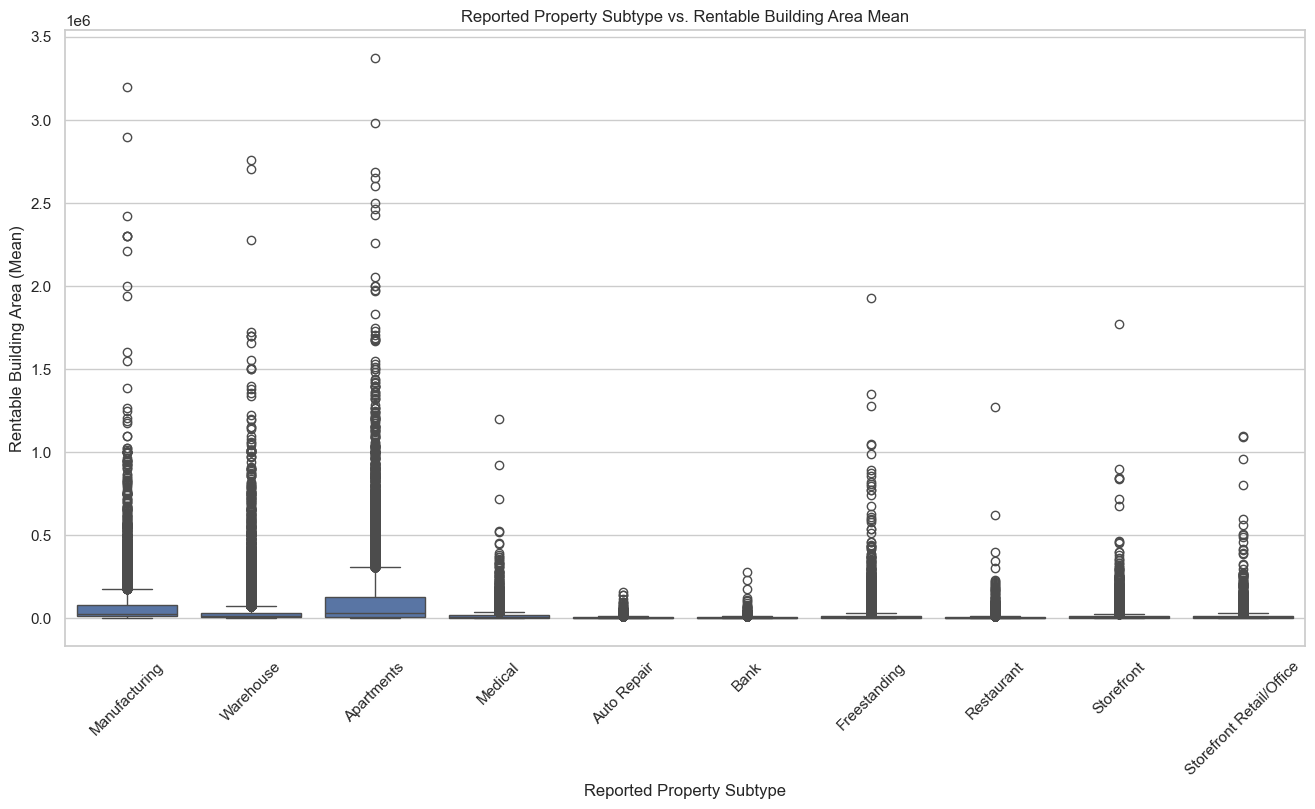

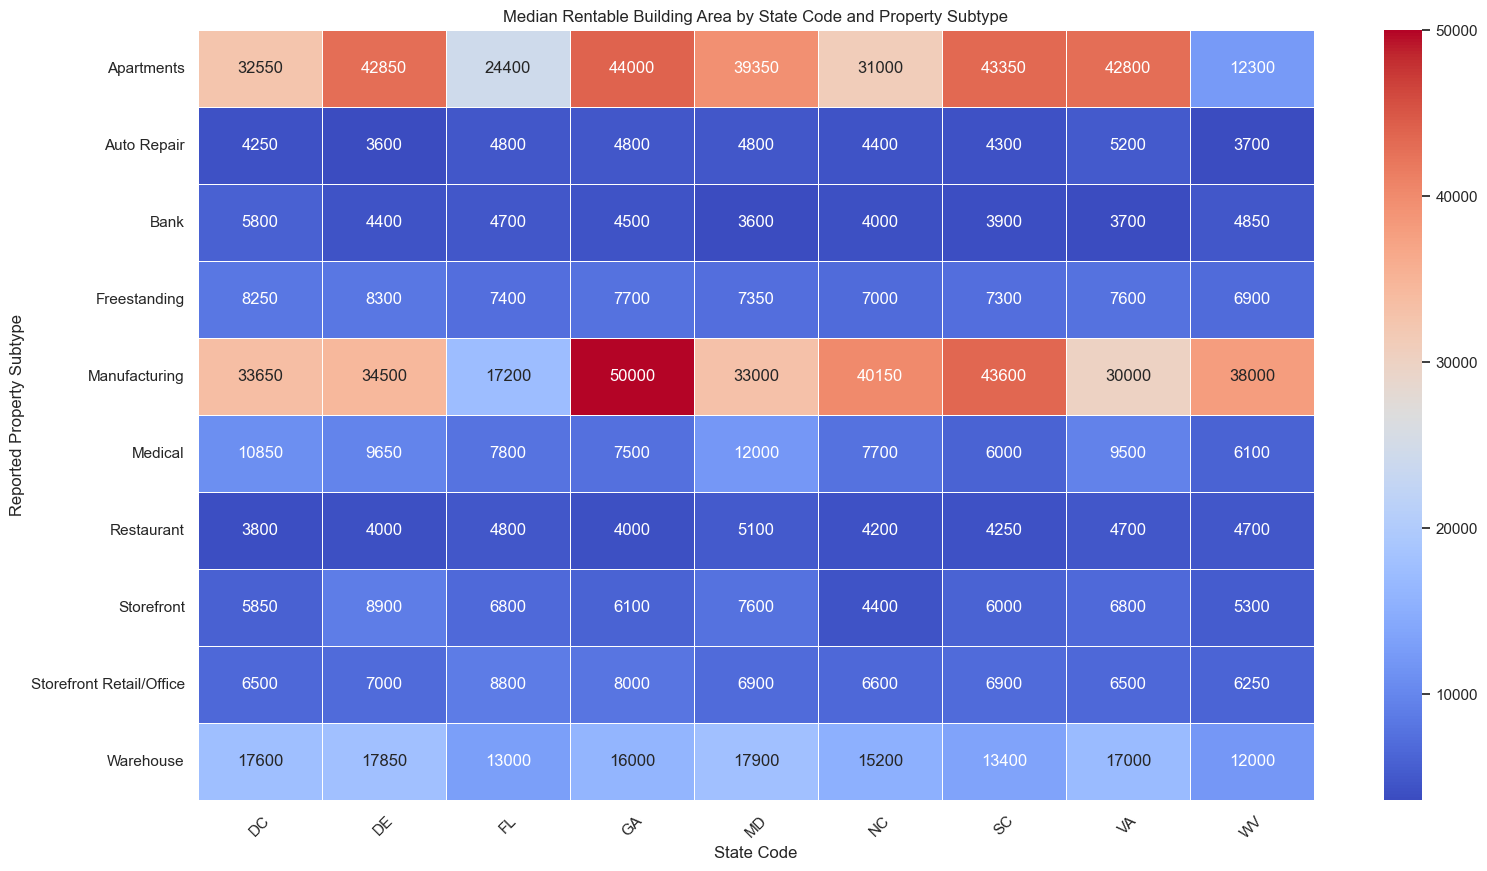

In [20]:
# Bivariate Analysis: 'reported_propertysubtype' vs 'rentablebuildingarea_mean'

# Filtering data to manage the size and make visualization clearer by focusing on the most common subtypes
common_subtypes = df['reported_propertysubtype'].value_counts().head(10).index
filtered_data_subtype = df[df['reported_propertysubtype'].isin(common_subtypes)]

plt.figure(figsize=(16, 8))

# Boxplot for 'reported_propertysubtype' vs 'rentablebuildingarea_mean'
sns.boxplot(x='reported_propertysubtype', y='rentablebuildingarea_mean', data=filtered_data_subtype)
plt.title('Reported Property Subtype vs. Rentable Building Area Mean')
plt.xlabel('Reported Property Subtype')
plt.ylabel('Rentable Building Area (Mean)')
plt.xticks(rotation=45)
plt.show()

# Interaction between 'statecode', 'reported_propertysubtype', and 'rentablebuildingarea_mean'
# Creating a pivot table for visualization
pivot_data = filtered_data_subtype.pivot_table(values='rentablebuildingarea_mean', index='reported_propertysubtype', columns='statecode', aggfunc='median')
plt.figure(figsize=(18, 10))
sns.heatmap(pivot_data, annot=True, fmt=".0f", linewidths=.5, cmap='coolwarm')
plt.title('Median Rentable Building Area by State Code and Property Subtype')
plt.xlabel('State Code')
plt.ylabel('Reported Property Subtype')
plt.xticks(rotation=45)
plt.show()


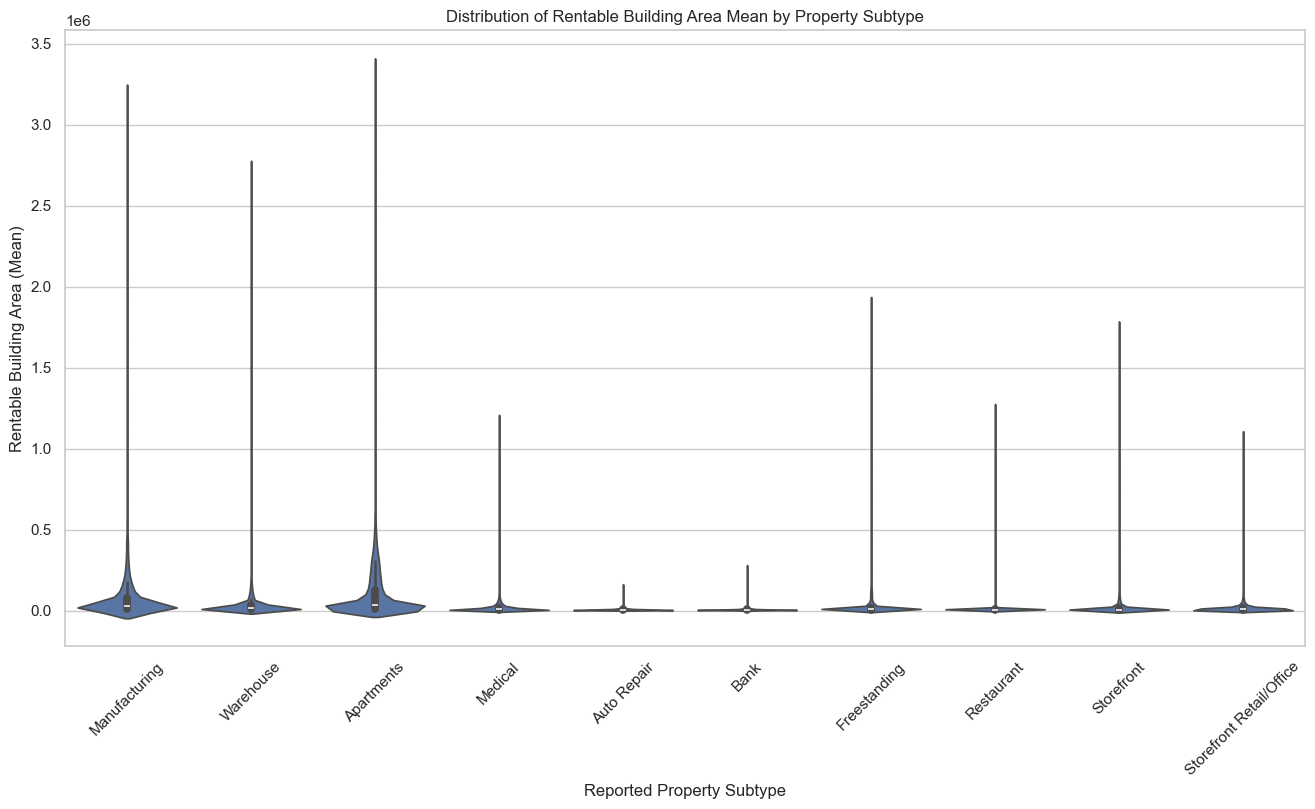

In [21]:
# Let's use a violin plot to better visualize the distribution of 'rentablebuildingarea_mean' across different 'reported_propertysubtype'

plt.figure(figsize=(16, 8))
sns.violinplot(x='reported_propertysubtype', y='rentablebuildingarea_mean', data=filtered_data_subtype, density_norm='width')
plt.title('Distribution of Rentable Building Area Mean by Property Subtype')
plt.xlabel('Reported Property Subtype')
plt.ylabel('Rentable Building Area (Mean)')
plt.xticks(rotation=45)
plt.show()


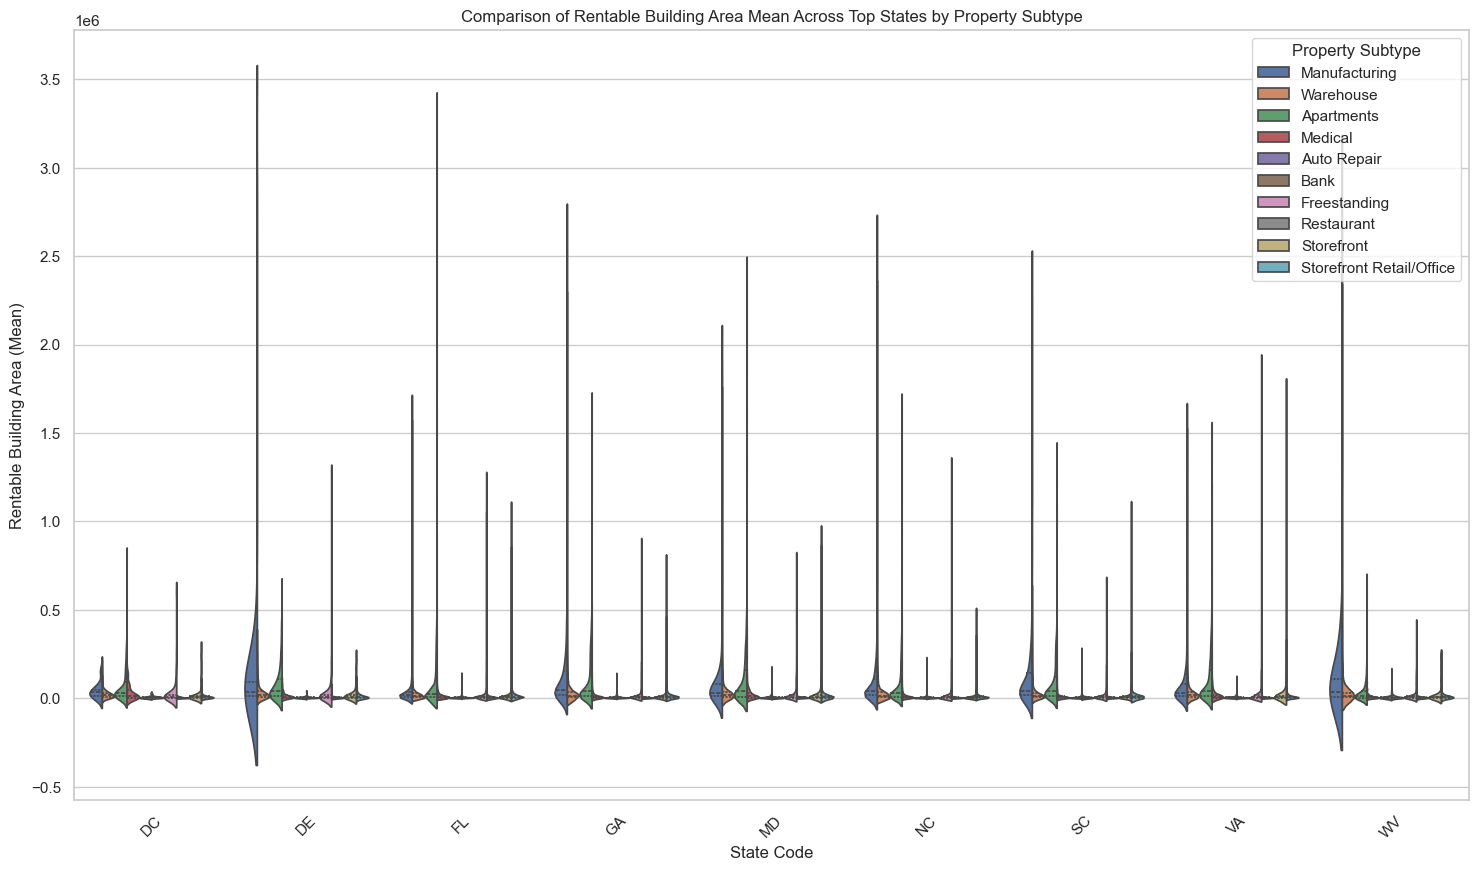

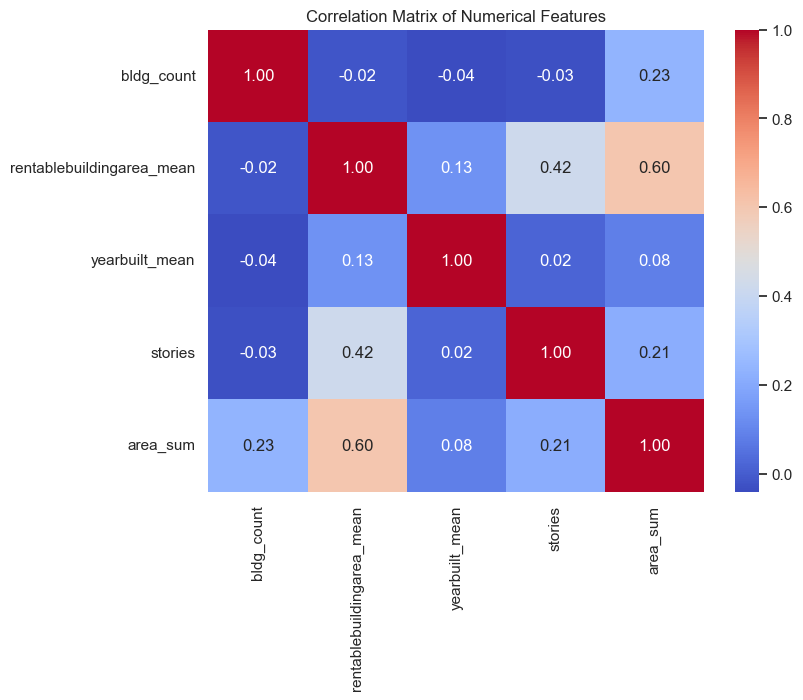

In [22]:
# Comparison Across States for the top common subtypes

# Let's create a larger subset of states to visualize the comparison
state_comparison_data = df[df['statecode'].isin(df['statecode'].value_counts().head(10).index) &
                                   df['reported_propertysubtype'].isin(common_subtypes)]

plt.figure(figsize=(18, 10))
sns.violinplot(x='statecode', y='rentablebuildingarea_mean', hue='reported_propertysubtype',
               data=state_comparison_data, split=True, density_norm='width', inner='quartile')
plt.title('Comparison of Rentable Building Area Mean Across Top States by Property Subtype')
plt.xlabel('State Code')
plt.ylabel('Rentable Building Area (Mean)')
plt.xticks(rotation=45)
plt.legend(title='Property Subtype')
plt.show()

# Correlation Analysis
# Select numerical columns to compute correlation
numerical_cols = ['bldg_count', 'rentablebuildingarea_mean', 'yearbuilt_mean', 'stories', 'area_sum']
correlation_matrix = df[numerical_cols].corr()

# Plotting correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


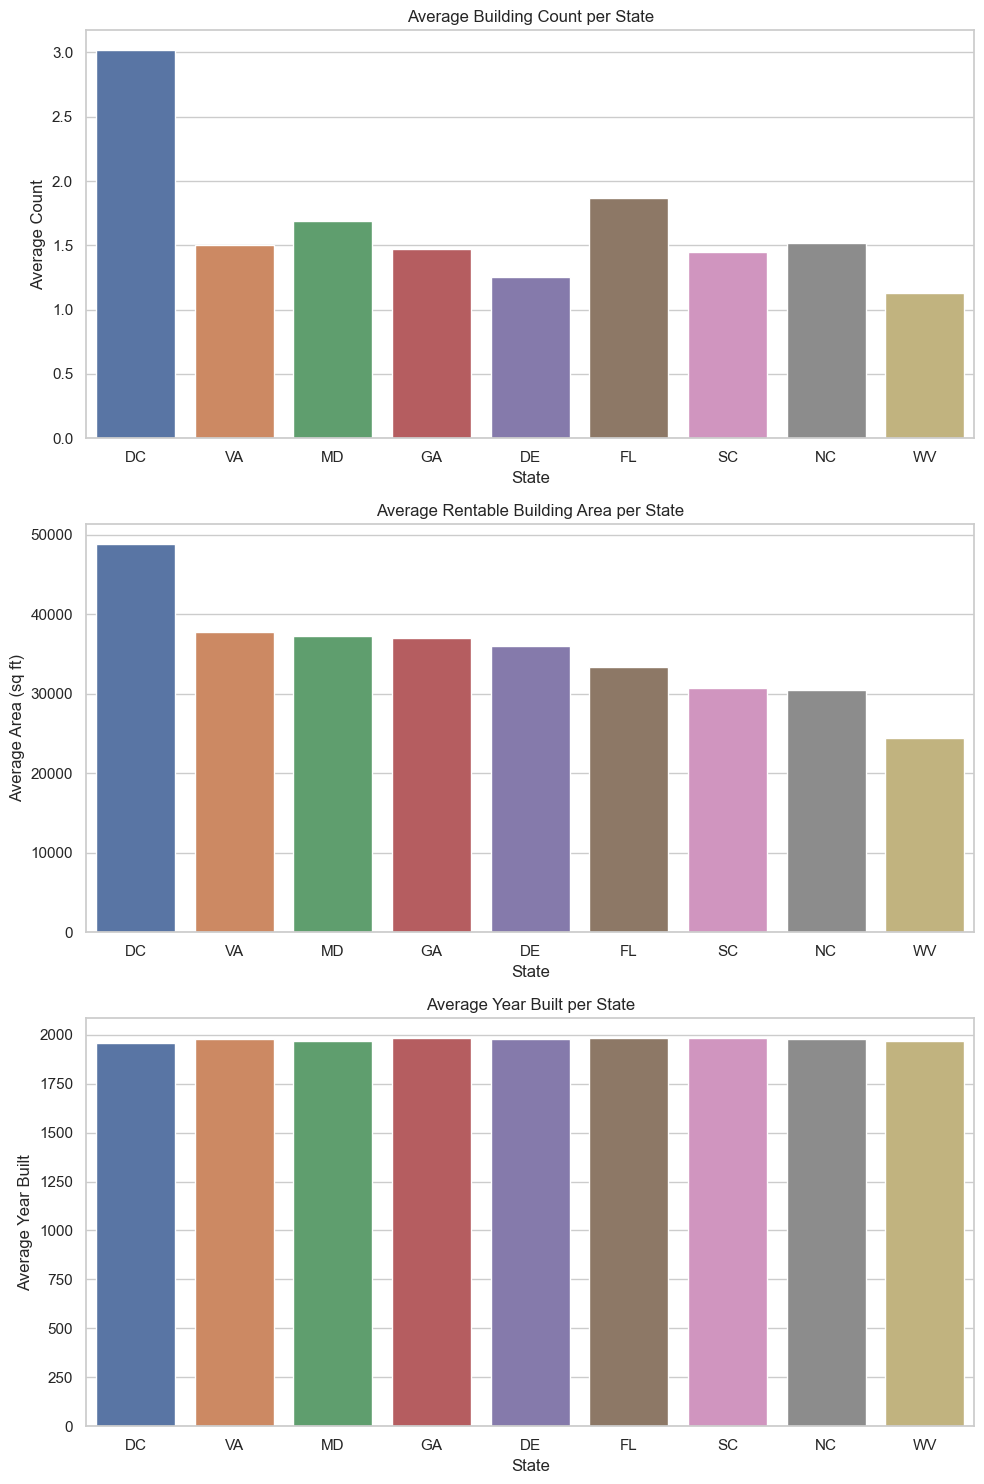

In [23]:
# Grouping data by statecode and calculating mean for key variables
state_grouped = df.groupby('statecode').agg({
    'bldg_count': 'mean',
    'rentablebuildingarea_mean': 'mean',
    'yearbuilt_mean': 'mean'
}).sort_values(by='rentablebuildingarea_mean', ascending=False)

# Plotting the results
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

sns.barplot(x=state_grouped.index, y=state_grouped['bldg_count'], ax=ax[0], hue = state_grouped.index)
ax[0].set_title('Average Building Count per State')
ax[0].set_ylabel('Average Count')
ax[0].set_xlabel('State')

sns.barplot(x=state_grouped.index, y=state_grouped['rentablebuildingarea_mean'], ax=ax[1], hue = state_grouped.index)
ax[1].set_title('Average Rentable Building Area per State')
ax[1].set_ylabel('Average Area (sq ft)')
ax[1].set_xlabel('State')

sns.barplot(x=state_grouped.index, y=state_grouped['yearbuilt_mean'] , ax=ax[2], hue = state_grouped.index)
ax[2].set_title('Average Year Built per State')
ax[2].set_ylabel('Average Year Built')
ax[2].set_xlabel('State')

plt.tight_layout()
plt.show()


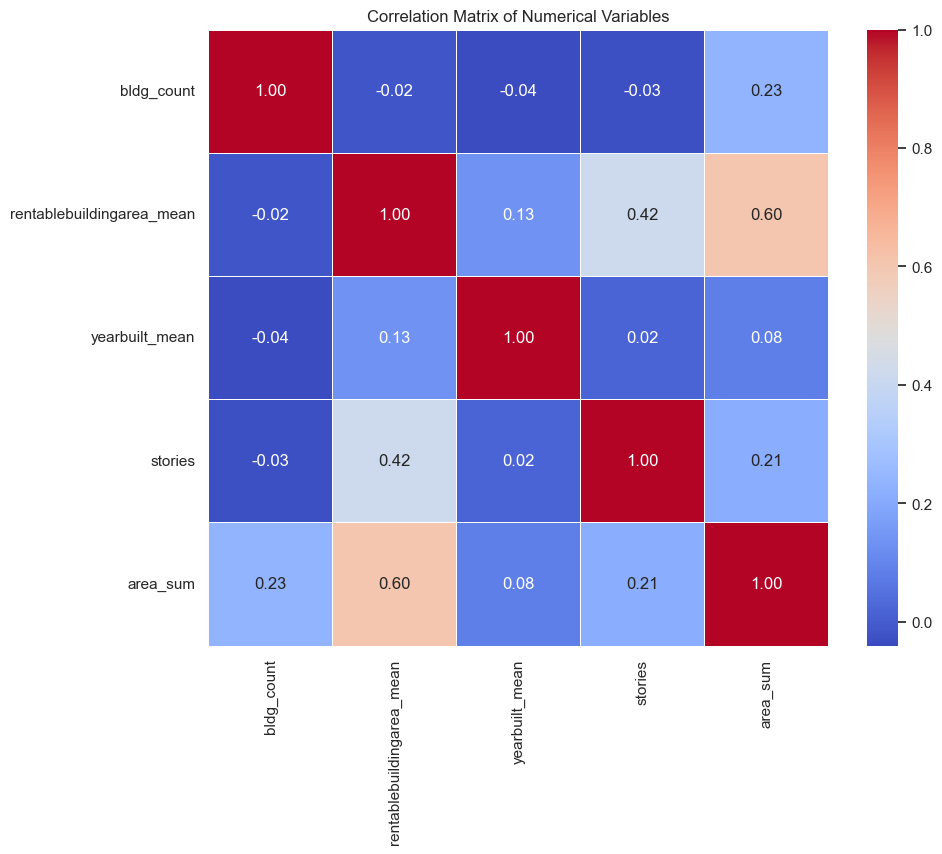

In [24]:
# Selecting numerical variables for correlation analysis
numerical_data = df[['bldg_count', 'rentablebuildingarea_mean', 'yearbuilt_mean', 'stories', 'area_sum']]

# Computing the correlation matrix
correlation_matrix = numerical_data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardizing the data before PCA
scaler = StandardScaler()
scaled_numerical_data = scaler.fit_transform(numerical_data)

# Applying PCA
pca = PCA(n_components=2)  # We reduce the dimension to 2 for visualization purposes
principal_components = pca.fit_transform(scaled_numerical_data)

# Creating a DataFrame for the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

# Variance explained by each component
explained_variance = pca.explained_variance_ratio_

# Plotting the principal components
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', data=pca_df)
plt.title('PCA of Dataset (2 Components)')
plt.xlabel(f'Principal Component 1 ({explained_variance[0]:.2f} variance explained)')
plt.ylabel(f'Principal Component 2 ({explained_variance[1]:.2f} variance explained)')
plt.grid(True)
plt.show(), explained_variance


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\Aryan\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Aryan\AppData\Local\Temp\ipykernel_28188\2182715454.py", line 10, in <module>
    principal_components = pca.fit_transform(scaled_numerical_data)
                           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Aryan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_set_output.py", line 295, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Aryan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Aryan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\deco

In [ ]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# We will perform a multiple regression analysis to see how well we can predict rentable building area
# based on other variables: year built, stories, and building count.

# Preparing the independent variables (X) and dependent variable (y)
X = numerical_data[['yearbuilt_mean', 'stories', 'bldg_count']]
y = numerical_data['rentablebuildingarea_mean']

# Adding a constant to the model (for intercept)
X = sm.add_constant(X)

# Fitting the regression model
model = sm.OLS(y, X).fit()

# Get the summary of the regression
model_summary = model.summary()
model_summary
